## **1. Build ANN for Fire Area Prediction**
<img src="https://cdn-images-1.medium.com/max/600/1*lGsIwcrmZ960TcvnBWSLwA.gif">

### Dataset Overview

* **Features**: meteorological data (`temp`, `RH`, `wind`, etc.), `month`, `day`, `FFMC`, `DMC`, `DC`, `ISI`
* **Target (Regression)**: `area` burned
* **Target (Classification)**: whether `area > 0` (fire occurred)

---

### **2. Install Required Libraries**

In [16]:
#!/bin/bash
!curl -L -o "forest-fires-data-set.zip" "https://www.kaggle.com/api/v1/datasets/download/elikplim/forest-fires-data-set"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7268  100  7268    0     0  20384      0 --:--:-- --:--:-- --:--:-- 20384


In [7]:
!unzip forest-fires-data-set.zip

Archive:  forest-fires-data-set.zip
  inflating: forestfires.csv         


In [8]:
!pip install -q seaborn pandas scikit-learn keras tensorflow

### ✅ **3. Load and Explore the Dataset**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

In [10]:
df = pd.read_csv("forestfires.csv")  # Upload your CSV file to Colab

In [12]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### 3. **Preprocessing**

#### A. Label Encoding for `month` and `day`

In [17]:
df['month'] = LabelEncoder().fit_transform(df['month'])
df['day'] = LabelEncoder().fit_transform(df['day'])

#### B. Add Binary Target for Classification

In [18]:
df['fire'] = df['area'].apply(lambda x: 1 if x > 0 else 0)

#### C. Feature-Target Split

In [19]:
X = df.drop(['area', 'fire'], axis=1)
y_reg = df['area']        # For regression
y_clf = df['fire']        # For classification

#### D. Scale Inputs

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### E. Split Data

In [21]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X_scaled, y_clf, test_size=0.2, random_state=42)

### 4A. **ANN for Classification**

In [22]:
model_clf = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_clf = model_clf.fit(X_train, y_train_clf, epochs=40, batch_size=16, validation_split=0.2)

Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5027 - loss: 0.7382 - val_accuracy: 0.4578 - val_loss: 0.7338
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4918 - loss: 0.7089 - val_accuracy: 0.4337 - val_loss: 0.7145
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5223 - loss: 0.6984 - val_accuracy: 0.4458 - val_loss: 0.7013
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5656 - loss: 0.6793 - val_accuracy: 0.5060 - val_loss: 0.6949
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5608 - loss: 0.6965 - val_accuracy: 0.4699 - val_loss: 0.6906
Epoch 6/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5799 - loss: 0.6808 - val_accuracy: 0.4578 - val_loss: 0.6877
Epoch 7/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5919 - loss: 0.6779 - val_accuracy: 0.4458 - val_loss: 0.6867
Epoch 8/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5799 - loss: 0.6808 - val_accuracy: 0.3976 - val_loss

### 5A. **Evaluation – Classification**

In [24]:
from sklearn.metrics import classification_report

In [25]:
y_pred_clf = (model_clf.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test_clf, y_pred_clf))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.57      0.45      0.51        51
           1       0.56      0.68      0.62        53

    accuracy                           0.57       104
   macro avg       0.57      0.57      0.56       104
weighted avg       0.57      0.57      0.56       104



### 4B. **ANN for Regression**

In [26]:
model_reg = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_reg = model_reg.fit(X_train, y_train_reg, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5329.5127 - mae: 15.9801 - val_loss: 629.1866 - val_mae: 7.1956
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1561.7322 - mae: 10.8540 - val_loss: 624.7234 - val_mae: 7.1274
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1334.8387 - mae: 11.0781 - val_loss: 619.4726 - val_mae: 7.1132
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2318.1826 - mae: 13.2428 - val_loss: 613.0329 - val_mae: 7.1514
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2776.0151 - mae: 12.9225 - val_loss: 607.4868 - val_mae: 7.2498
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3760.6597 - mae: 13.6666 - val_loss: 601.9773 - val_mae: 7.3946
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2070.1924 - mae: 11.7461 - val_loss: 596.8729 - val_mae: 7.6526
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1625.3966 - mae: 10.6810 - val_loss: 592.4754 - val_mae: 7.9736
Epoch 9/50
21/21 ━━━━━━

### 5B. **Evaluation – Regression**

In [28]:
loss, mae = model_reg.evaluate(X_test, y_test_reg)
print(f"Test MAE: {mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10832.8428 - mae: 23.4119
Test MAE: 24.98


### 6. **Visualize Training Curves**

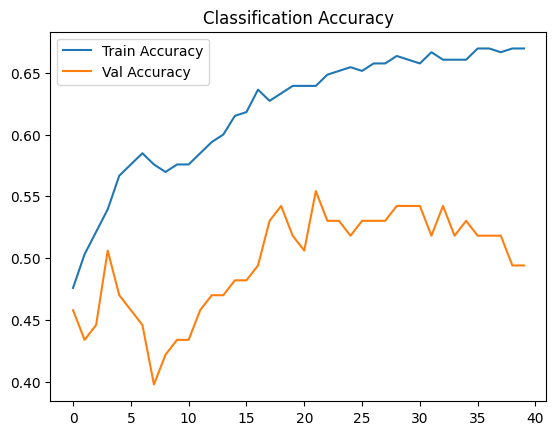

In [29]:
# For classification
plt.plot(history_clf.history['accuracy'], label='Train Accuracy')
plt.plot(history_clf.history['val_accuracy'], label='Val Accuracy')
plt.title("Classification Accuracy")
plt.legend()
plt.show()

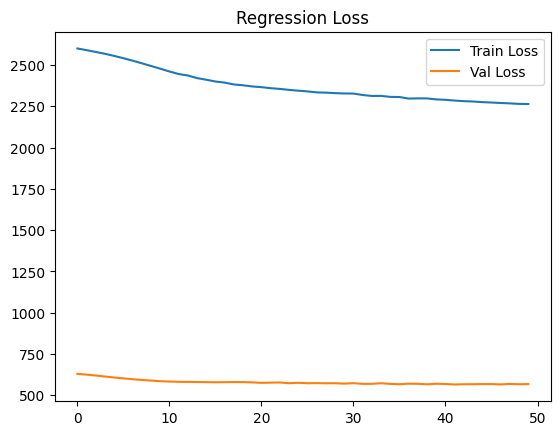

In [30]:
# For regression
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Val Loss')
plt.title("Regression Loss")
plt.legend()
plt.show()

## ✅ **Sample Input**

Dataset columns (after encoding `month` and `day`) are:

```
X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain
```

Assume the encodings are:

* `month = 'aug' → 7`
* `day = 'fri' → 4`

### 🔢 Example Sample Input Row:

In [31]:
sample = {
    "X": 7,
    "Y": 5,
    "month": 7,       # Encoded 'aug'
    "day": 4,         # Encoded 'fri'
    "FFMC": 86.2,
    "DMC": 26.2,
    "DC": 94.3,
    "ISI": 5.1,
    "temp": 8.2,
    "RH": 51,
    "wind": 6.7,
    "rain": 0.0
}

### 🔹 Convert to DataFrame and Scale

In [32]:
import numpy as np
sample_input = pd.DataFrame([sample])
sample_scaled = scaler.transform(sample_input)  # Use the same scaler used during training

### 🔹 Classification: Predict Fire or Not

In [37]:
fire_prediction = model_clf.predict(sample_scaled)
print("Fire likely" if fire_prediction[0][0] > 0.5 else "No fire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
No fire


### 🔹 Regression: Predict Burned Area

In [35]:
area_prediction = model_reg.predict(sample_scaled)
print(f"Predicted burned area: {area_prediction[0][0]:.2f} ha")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted burned area: 7.76 ha
